# NetworthCorpAssignment_Customer_Analysis Assignment_vaibhav_tayade

Name: Vaibhav Vilas Tayade
    
emailid: vaibhav_t29@rediffmail.com

No: 8087970061

In [1]:
# Importing libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# reading csv file and creating dataframe:
product_description_df = pd.read_excel('Customer_Raw_data.xlsx', sheet_name = 'Product Description')
product_performance_df = pd.read_excel('Customer_Raw_data.xlsx', sheet_name = 'Product Performance')
unbxd_query_performance_df = pd.read_excel('Customer_Raw_data.xlsx', sheet_name = 'Unbxd Query performance')

As we see there are three datasets in our raw file. we can analyse them one by one in the end altogether.

# Product description dataset

# Fig - 1

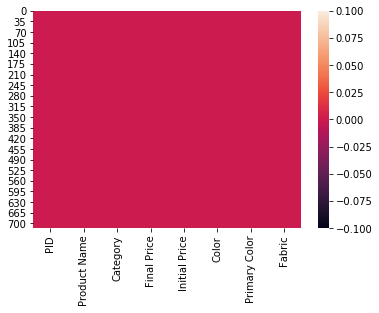

In [3]:
sns.heatmap(product_description_df.isnull())

observation: There are no Null values in our dataset

In [4]:
product_description_df.head()

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester


In [5]:
product_description_df.describe()

,Final Price,Initial Price
count,716.000000,716.000000
mean,87.556145,59.961173
std,65.990685,68.248824
min,39.950000,19.950000
25%,61.950000,39.700000
50%,79.950000,47.950000
75%,96.950000,59.950000
max,699.950000,699.950000


observation: we can the presence of outliers but we need to do more analysis to confirm that.

In [6]:
product_description_df['Fabric'].value_counts()

 Cotton                      263
 Cotton Spandex              139
 Polyester                   104
 Polyester Crepe de Chine     43
 Polyester Spandex            32
 Viscose Spandex              20
 Cotton Polyester             17
 Cotton Polyester Spandex     17
 Rayon Nylon Spandex          12
 Polyamide Spandex            12
 Rayon Polyester Spandex       7
 Silk                          7
 Rayon                         6
 Cotton Nylon                  6
 Viscose                       4
 Polyester Rayon Spandex       4
 Polyester Nylon               4
 Cotton Rayon Spandex          4
 Tencel                        3
 Nylon                         3
 Nylon Polyester               2
 Polyester Metallic            2
 Polyester Rayon               2
 Nylon Cotton                  1
 Wool Nylon                    1
 Cotton Linen                  1
Name: Fabric, dtype: int64

In [7]:
product_description_df['Category'].value_counts()

 Dress       428
 Top         147
 Skirt        72
 Pant         49
 Jumpsuit     11
 Jacket        9
Name: Category, dtype: int64

In [8]:
product_description_df['Color'].value_counts()

 Black                     39
 Deep navy                 23
 Deep indigo               21
 Black/white               18
 Black multi               17
                           ..
 Beige/off-white multi      1
 White/olive/deep green     1
 Black/cream/gray           1
 Maize yellow/gold          1
 Yellow/off-white multi     1
Name: Color, Length: 327, dtype: int64

In [9]:
product_description_df['Primary Color'].value_counts()

 Black          100
 White           59
 Off-white       56
 Deep navy       44
 Deep indigo     29
               ... 
 Peach            1
 Mustard          1
 Teal             1
 Deep coral       1
 Crimson red      1
Name: Primary Color, Length: 122, dtype: int64

# Fig - 2

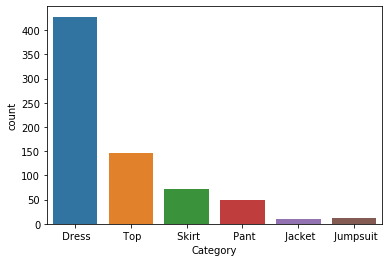

In [10]:
#Before balancing the target label column:

sns.countplot(x='Category', data=product_description_df)
plt.show()

Observation: Dress and Top category has maximum number of datasets while skirt and Pant has medium level of datasets and Jacket and jumpsuit has minimum number of datasets.

# Product performance dataset

# Fig - 3

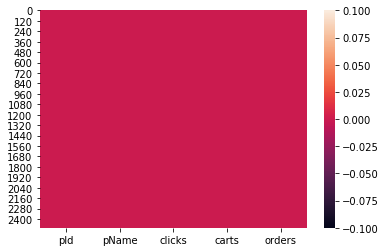

In [11]:
sns.heatmap(product_performance_df.isnull())

observation: There are no Null values in our dataset

In [12]:
product_performance_df.head()

,pId,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97
3,CL0032310,Cotton knit fit and flare dress,16234,350,99
4,CL0037110,Pleat front chambray denim maxi dress,13317,229,56


Observation: we can easily make out from the above data frame view that, where there are more 'clicks' on particular product, there are more number of 'carted' products and eventually more number of corresponding 'orders' as well.

In [13]:
product_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pId     2501 non-null   object
 1   pName   2501 non-null   object
 2   clicks  2501 non-null   int64 
 3   carts   2501 non-null   int64 
 4   orders  2501 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 97.8+ KB


# Fig - 4

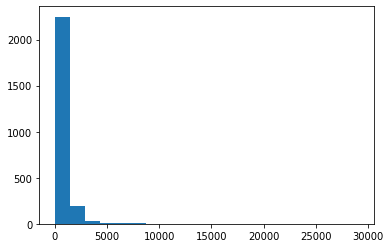

In [14]:
plt.hist(product_performance_df['clicks'], bins = 20)
plt.show()

#Observation: we can make out from the above histogram, there are more datasets with less clicks number than 5000 while less datasets with more than 5000 clicks.

# For the sake of understanding, we study the dataset having more than 5000 clicks

In [15]:
# separating the datasets with more than 5000 clicks and less than 5000 clicks.
product_performance_df_greaterthan5000clicks = product_performance_df[product_performance_df['clicks'] > 5000]

In [16]:
len(product_performance_df_greaterthan5000clicks['clicks'])

26

Observation: we can make out from the above data analysis process that there are 26 products available with more than 5000 clicks.

In [17]:
maximum_clicked_products = product_performance_df_greaterthan5000clicks['pName']

In [18]:
product_performance_df_greaterthan5000clicks['clicks']

0     29144
1     25892
2     16343
3     16234
4     13317
5     13234
6     12364
7     10680
8     10454
9      9571
10     8407
11     8373
12     8287
13     8280
14     8231
15     7360
16     7175
17     6882
18     6848
19     6798
20     6335
21     6229
22     5693
23     5338
24     5174
25     5015
Name: clicks, dtype: int64

# Fig - 5

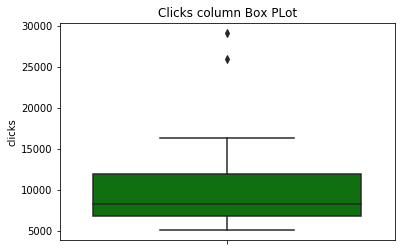

In [19]:
# 1 - BoxPlot of ' Clicks column ' Box plot:
plt.title('Clicks column Box PLot')
sns.boxplot(product_performance_df_greaterthan5000clicks['clicks'],color='green',orient='v')

# Fig -6

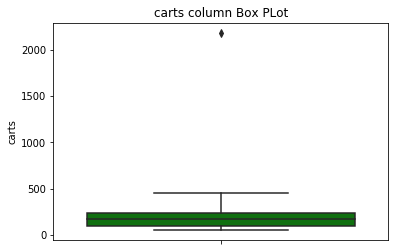

In [20]:
# 2 - BoxPlot of ' Carts column ' Box plot:
plt.title('carts column Box PLot')
sns.boxplot(product_performance_df_greaterthan5000clicks['carts'],color='green',orient='v')

# Fig -7

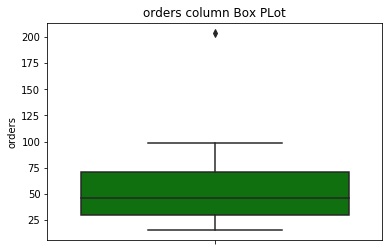

In [21]:
# 3 - BoxPlot of ' Orders column ' Box plot:
plt.title('orders column Box PLot')
sns.boxplot(product_performance_df_greaterthan5000clicks['orders'],color='green',orient='v')

Observations: We can see that from the above box plots, there seems to be the outliers in the datasets, but thats primarily because of the uneven distributed clicks between the products, we have 5 products with clicks number ranging from 10000 to 15000, 2 products with clicks ranging from 15000 to 20000, 2 products with clicks ranging from 25000 to 30000, and 16 products with clicks ranging from 5000 to 10000. 

In [22]:
# creating few new columns like unordered and uncarted products.
product_performance_df_greaterthan5000clicks['unordered'] = product_performance_df_greaterthan5000clicks['carts']-product_performance_df_greaterthan5000clicks['orders']

In [23]:
product_performance_df_greaterthan5000clicks['uncarted'] = product_performance_df_greaterthan5000clicks['clicks']-product_performance_df_greaterthan5000clicks['carts']

In [24]:
product_performance_df_greaterthan5000clicks.head()

,pId,pName,clicks,carts,orders,unordered,uncarted
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204,1977,26963
1,CL0037085,Chevron stripe colorblock maxi dress,25892,237,70,167,25655
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97,243,16003
3,CL0032310,Cotton knit fit and flare dress,16234,350,99,251,15884
4,CL0037110,Pleat front chambray denim maxi dress,13317,229,56,173,13088


# Fig - 8

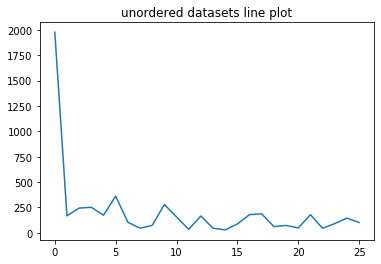

In [62]:
plt.title('unordered datasets line plot')
plt.plot(product_performance_df_greaterthan5000clicks['unordered'])


Observation: We can make out that there are few datasets with very high number of unordered values, while rest of dataset has nominal unordered values.

# Fig - 9

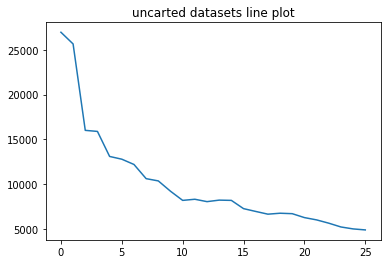

In [63]:
plt.title('uncarted datasets line plot')
plt.plot(product_performance_df_greaterthan5000clicks['uncarted'])

Observation: We can make out that there are few datasets with very high number of uncarted values, while rest of dataset has nominal uncarted values.

In [27]:
len(product_performance_df)

2501

# Making Orders prediction model depending on click, carts datasets

In [28]:
product_performance_dfnew = product_performance_df[['pName', 'clicks', 'carts', 'orders']]

In [29]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

product_performance_dfnew['pName'] = LE.fit_transform(product_performance_dfnew['pName'])

In [30]:
product_performance_dfnew.head()

,pName,clicks,carts,orders
0,113,29144,2181,204
1,113,25892,237,70
2,64,16343,340,97
3,180,16234,350,99
4,744,13317,229,56


In [31]:
#Scaling the dataset::
sc = StandardScaler()
full_product_performance= sc.fit_transform(product_performance_dfnew)
columnslist = ['pName', 'clicks', 'carts', 'orders']
full_product_performance_scaled = pd.DataFrame(full_product_performance, columns = columnslist)
full_product_performance_scaled.head()

,pName,clicks,carts,orders
0,-2.105655,21.195728,41.049361,23.882960
1,-2.105655,18.785577,4.259874,7.947768
2,-2.314003,11.708536,6.209111,11.158591
3,-1.820771,11.627753,6.398357,11.396429
4,0.577360,9.465880,4.108477,6.282897


# Checking the correlation matrix:

In [32]:
df_cor = full_product_performance_scaled.corr()

# Fig - 10

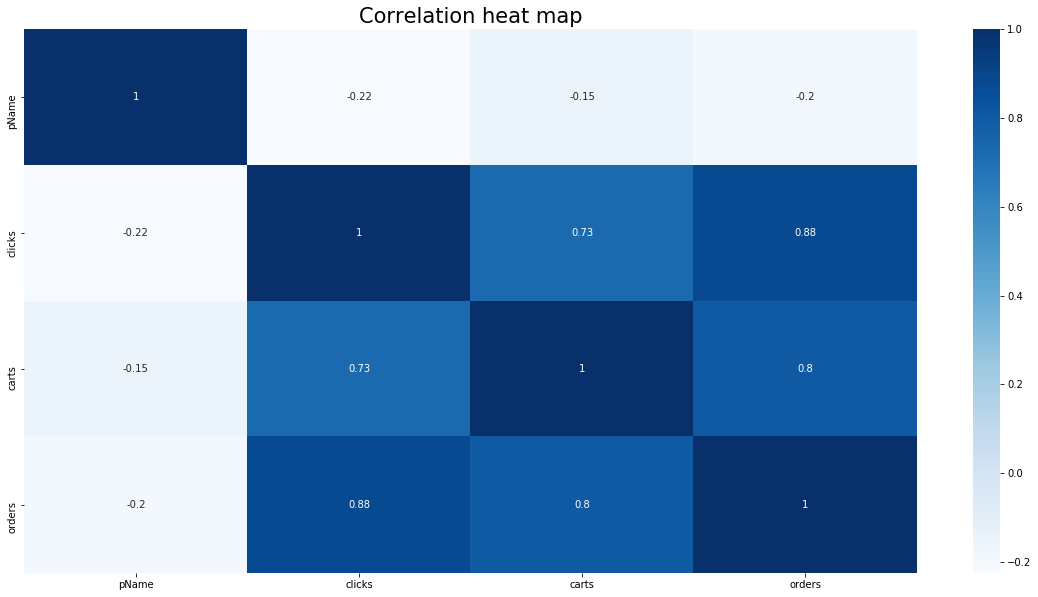

In [33]:
# plotting correlation matrix using heatmap
plt.figure(figsize=(20,10))
plt.title('Correlation heat map', fontsize = 21)

sns.heatmap(df_cor,cmap='Blues', annot=True)

Observation: We can see that from the above correlation chart that, both clicks and carts values are highly correlated with orders column values.

In [34]:
# creating x,y dataset for further model building.
x = full_product_performance_scaled.iloc[:,0:3]

In [35]:
y = full_product_performance_scaled.iloc[:,-1]

In [36]:
#creating train test dataset from the x and y part inorder to start model making.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 3)
(2000,)
(501, 3)
(501,)


# Linear Regression model

In [37]:
# Linear Regression model making:
lm = LinearRegression()
lm.fit(x_train, y_train)

print('linearRegression Coeffient', lm.coef_)
print('linearRegression Intercept', lm.intercept_)
print('linearRegression score', lm.score(x_train, y_train))

# predicting x_test values
y_pred = lm.predict(x_test)
y_pred

linearRegression Coeffient [-0.01180309  0.62911512  0.33031792]
linearRegression Intercept 0.0033685532403477762
linearRegression score 0.8337276695037339


array([-4.36153743e-02,  1.14569118e-01, -6.62067057e-02,  5.63380876e-01,
       -2.09377659e-01, -3.10555091e-01, -3.21278966e-01, -2.79315976e-01,
       -1.51313884e-02, -3.08608608e-01,  3.50099768e-01, -3.27806542e-01,
       -2.85372599e-01, -3.18947689e-01, -3.25475265e-01,  1.52206854e-01,
       -5.85206915e-02, -3.09175717e-01,  2.52498767e-01, -2.11152304e-01,
       -3.01229982e-01, -6.36725559e-02,  4.03925265e-01, -3.13697467e-01,
       -2.41636970e-01, -3.23143988e-01, -1.41197527e-01, -2.93303639e-01,
       -7.85000847e-02, -3.18481433e-01, -1.97738595e-01, -2.86577616e-01,
       -3.15217645e-01,  2.60928384e-01, -1.99893848e-01, -3.10555091e-01,
       -3.21745221e-01, -2.93303639e-01, -1.18568065e-01, -3.19880200e-01,
       -3.06825047e-01,  7.66711525e-01,  6.38583963e-02, -3.03561259e-01,
       -3.17548922e-01, -3.08690069e-01, -2.72788400e-01, -4.24453372e-02,
       -1.35480265e-01, -3.10088835e-01, -3.15217645e-01, -9.40021163e-02,
        6.07947955e-01, -

In [38]:
# calculating errors::
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.17498006519002202
MEAN SQUARED ERROR:  0.1251507142184426
ROOT MEAN SQUARED ERROR:  0.35376646847665283


In [39]:
print('r2 Score of Linear Regression model: \n')
print(r2_score(y_test, y_pred))

r2 Score of Linear Regression model: 

0.7533986492619723


In [40]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(lm, x, y, cv=cv1).mean())

0.7440914512307453


# Support vector regression model

In [41]:
from sklearn.svm import SVR

kernellist = ['linear', 'poly', 'rbf']

for i in kernellist:
    sv = SVR(kernel = i)
    sv.fit(x_train, y_train)
    print('\nkernel : ' + i)
    print(sv.score(x_train, y_train))


kernel : linear
0.6224258997854479

kernel : poly
0.7227634924497371

kernel : rbf
0.6331156979628442


In [42]:
sv = SVR(kernel = 'poly')
sv.fit(x_train, y_train)
print('\nkernel : poly')
print(sv.score(x_train, y_train))


kernel : poly
0.7227634924497371


In [43]:
sv_y_pred = sv.predict(x_test)
print(sv.score(x_train, y_train))

0.7227634924497371


In [44]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, sv_y_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, sv_y_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, sv_y_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.24161264901288
MEAN SQUARED ERROR:  0.22624188578967006
ROOT MEAN SQUARED ERROR:  0.4756489102160017


In [45]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(sv, x, y, cv=cv1).mean())

-89.33696298866477


# Random Forest regression model

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)
print(rf.score(x_train, y_train))

0.9667492137452858


In [47]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, rfpred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, rfpred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, rfpred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.14554445038919253
MEAN SQUARED ERROR:  0.09391744656432909
ROOT MEAN SQUARED ERROR:  0.3064595349541748


In [48]:
cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf, x, y, cv=cv1).mean())

0.7273766338489709


# Ada Boost regression model

In [49]:
adr = AdaBoostRegressor(n_estimators=100)
adr.fit(x_train, y_train)
adr_pred=adr.predict(x_test)
print(adr.score(x_train, y_train))

0.8371902700023341


In [50]:
print('ERRORS:')
print("MEAN ABSOLUTE ERROR: ", mean_absolute_error(y_test, adr_pred))
print("MEAN SQUARED ERROR: ", mean_squared_error(y_test, adr_pred))
print('ROOT MEAN SQUARED ERROR: ', np.sqrt(mean_squared_error(y_test, adr_pred)))

ERRORS:
MEAN ABSOLUTE ERROR:  0.3691063925732223
MEAN SQUARED ERROR:  0.19919736488202522
ROOT MEAN SQUARED ERROR:  0.4463153200171659


In [51]:
from sklearn.model_selection import KFold

cv1 = KFold(n_splits=10, shuffle=True)

print(cross_val_score(adr, x, y, cv= cv1).mean())

0.32476927697784086


# FINAL MODEL SELECTION:

Observation: Linear regression seems to be the best model to predicts the orders because their score and cross validation difference seems to be less among all the models.

# Fig - 11

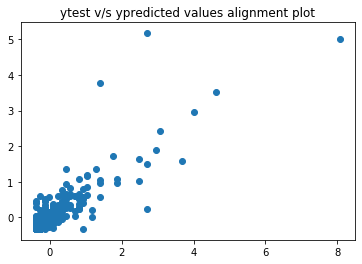

In [64]:
# scatter plot of y_test and predicted y_test dataset
plt.title('ytest v/s ypredicted values alignment plot')
plt.scatter(y_test, y_pred)

Observation: We can see that both the ytest and ypredicted values seems to be linear in nature and near about aligned on eachother.

In [53]:
import joblib
joblib.dump(lm, 'customer_order_prediction_Model.pkl')

['customer_order_prediction_Model.pkl']

In [54]:
#Reloading the model and predicting the dataset.
customer_order_prediction_Model = joblib.load('customer_order_prediction_Model.pkl')
customer_order_prediction_Model.predict(x_test)

array([-4.36153743e-02,  1.14569118e-01, -6.62067057e-02,  5.63380876e-01,
       -2.09377659e-01, -3.10555091e-01, -3.21278966e-01, -2.79315976e-01,
       -1.51313884e-02, -3.08608608e-01,  3.50099768e-01, -3.27806542e-01,
       -2.85372599e-01, -3.18947689e-01, -3.25475265e-01,  1.52206854e-01,
       -5.85206915e-02, -3.09175717e-01,  2.52498767e-01, -2.11152304e-01,
       -3.01229982e-01, -6.36725559e-02,  4.03925265e-01, -3.13697467e-01,
       -2.41636970e-01, -3.23143988e-01, -1.41197527e-01, -2.93303639e-01,
       -7.85000847e-02, -3.18481433e-01, -1.97738595e-01, -2.86577616e-01,
       -3.15217645e-01,  2.60928384e-01, -1.99893848e-01, -3.10555091e-01,
       -3.21745221e-01, -2.93303639e-01, -1.18568065e-01, -3.19880200e-01,
       -3.06825047e-01,  7.66711525e-01,  6.38583963e-02, -3.03561259e-01,
       -3.17548922e-01, -3.08690069e-01, -2.72788400e-01, -4.24453372e-02,
       -1.35480265e-01, -3.10088835e-01, -3.15217645e-01, -9.40021163e-02,
        6.07947955e-01, -

OBSERVATION: Linear regression model seems to be the perfect model if we need to predict the possible orders turned out tobe depending on the number of clicks and carted values of any particular product and eventually our model is working with the accuracy of 83%. customer_order_prediction_Model.pkl is our final model to predict the probability of orders from the clicks and carted database.

# STUDYING THE OTHER DATASETS INORDER TO GET MORE INSIGHTS

# Fig - 12

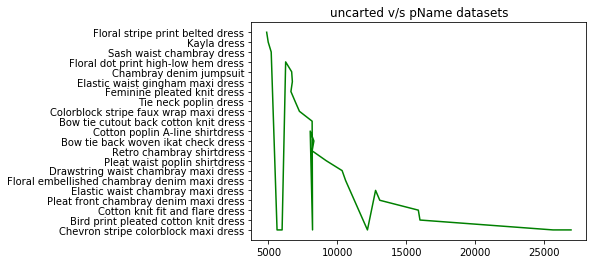

In [59]:
#plotting the uncarted data v/s pName values
plt.title('uncarted v/s pName datasets')
plt.plot(product_performance_df_greaterthan5000clicks['uncarted'], product_performance_df_greaterthan5000clicks['pName'],color='green')

# Fig - 13

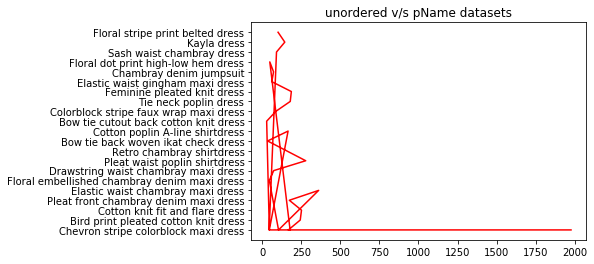

In [60]:
#plotting the unordered data v/s pName values
plt.title('unordered v/s pName datasets')
plt.plot(product_performance_df_greaterthan5000clicks['unordered'], product_performance_df_greaterthan5000clicks['pName'],color='red')

# Fig - 14

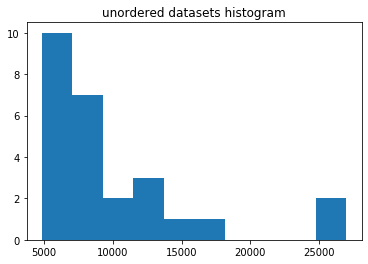

In [61]:
plt.title('unordered datasets histogram')
plt.hist(product_performance_df_greaterthan5000clicks['uncarted'], bins = 10)
plt.show()

# Working on dataset with less than 5000 clicks

In [69]:
# separating the datasets with less than 5000 clicks.
product_performance_df_lessthan5000clicks = product_performance_df[product_performance_df['clicks'] < 5000]

In [70]:
len(product_performance_df_lessthan5000clicks)

2475

In [71]:
product_performance_df_with_zero_clicks = product_performance_df['clicks'] == 0

In [72]:
len(product_performance_df_with_zero_clicks)

2501

In [73]:
product_performance_greaterthan0clicks = product_performance_df_lessthan5000clicks['clicks'] > 0

In [74]:
len(product_performance_greaterthan0clicks)

2475

In [75]:
product_performance_df_greaterthan5000clicks.columns

Index(['pId', 'pName', 'clicks', 'carts', 'orders', 'unordered', 'uncarted'], dtype='object')

In [76]:
product_performance_df_greaterthan5000clicknew = product_performance_df_greaterthan5000clicks[['clicks', 'carts', 'orders', 'unordered', 'uncarted']]

In [77]:
#Scaling the dataset::
sc = StandardScaler()
product_performance_df_scaled= sc.fit_transform(product_performance_df_greaterthan5000clicknew)
columnslist = ['clicks', 'carts', 'orders', 'unordered', 'uncarted']
product_performance_scaled = pd.DataFrame(product_performance_df_scaled, columns = columnslist)
product_performance_scaled.head()

,clicks,carts,orders,unordered,uncarted
0,3.205688,4.820157,3.796461,4.867778,3.021428
1,2.652627,-0.056637,0.357337,-0.100183,2.787967
2,1.028649,0.201752,1.050295,0.108417,1.065215
3,1.010112,0.226839,1.101625,0.130375,1.043975
4,0.514024,-0.076706,-0.001974,-0.083714,0.544926


# Fig - 15

Text(0, 0.5, 'WCSS1')

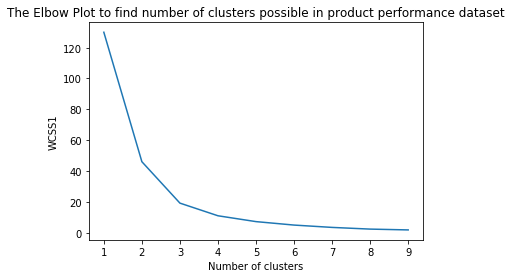

In [79]:
from sklearn.cluster import KMeans
wcss1=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(product_performance_scaled)

    wcss_iter = kmeans.inertia_
    wcss1.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters, wcss1)
plt.title('The Elbow Plot to find number of clusters possible in product performance dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS1')

Observation: We can see that from the above elbow plot, 3 seems to be number of  cluster number above which theres not much difference in the distances between the clusters.

In [81]:
# considering 3 as the number of clusters to making in the plot.
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(product_performance_scaled)

KMeans(n_clusters=3)

In [82]:
identified_clusters = kmeans.fit_predict(product_performance_scaled)
identified_clusters

array([1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

# Fig - 16

Text(0, 0.5, 'Unordered Values')

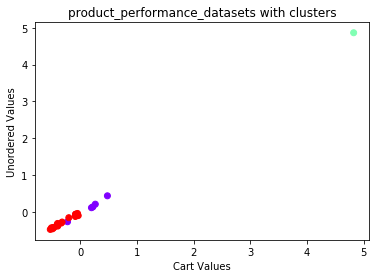

In [86]:
data_with_clusters = product_performance_scaled.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.title('product_performance_datasets with clusters')
plt.scatter(data_with_clusters['carts'], data_with_clusters['unordered'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Cart Values', fontsize=10)
plt.ylabel('Unordered Values', fontsize=10)

observation: There seems to be 3 clusters in the datasets. red clusters indicating less carted order and less unordered values, and purple cluster indicating little more than red clusters values of cart values and moderate level of unordered values, while last cluster skyblue color cluster with high cart values and high unordered values.

# Fig - 17

Text(0, 0.5, 'Uncarted Values')

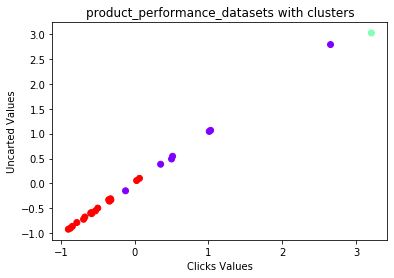

In [88]:
data_with_clusters = product_performance_scaled.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.title('product_performance_datasets with clusters')
plt.scatter(data_with_clusters['clicks'],data_with_clusters['uncarted'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Clicks Values', fontsize=10)
plt.ylabel('Uncarted Values', fontsize=10)

observation: There seems to be 3 clusters in the datasets. red clusters indicating less clicked datasets order and less uncarted values, and purple cluster indicating little more than red clusters values of click values and moderate level to high values of uncarted values, while last cluster skyblue color cluster with high click values and high uncarted values.

# unbxd query performance dataset

In [89]:
unbxd_query_performance_df.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0


# Fig - 18

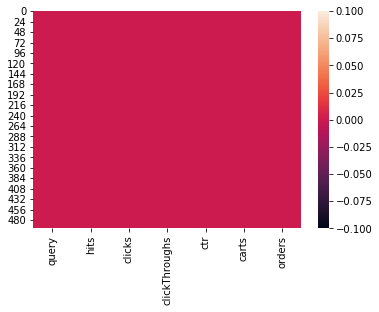

In [90]:
sns.heatmap(unbxd_query_performance_df.isnull())

In [91]:
query_performance_df = unbxd_query_performance_df[["hits","clicks","clickThroughs","ctr","carts","orders"]]

In [92]:
query_performance_df.head(2)

,hits,clicks,clickThroughs,ctr,carts,orders
0,3971,330,93,2.34,18,0
1,612,1360,447,73.04,145,8


In [93]:
#Removing Outliers:

from scipy.stats import zscore
z=np.abs(zscore(query_performance_df))
z

array([[20.46757035,  1.60972263,  1.3752751 ,  2.77299517,  0.02750179,
         0.45865467],
       [ 2.88129117,  8.80659   ,  9.18207067,  0.83791503,  2.05344537,
         5.44044081],
       [ 2.8236999 ,  0.69606983,  0.67566272,  2.89250761,  0.25963983,
         0.45865467],
       ...,
       [ 0.24957962,  0.64017183,  0.58745034,  1.43333216,  0.19583058,
         0.45865467],
       [ 0.24957962,  0.56331209,  0.56539725,  1.06866598,  0.13202133,
         0.45865467],
       [ 0.24957962,  0.50741409,  0.47718487,  0.3910202 ,  0.25963983,
         0.45865467]])

In [94]:
threshold = 3
print(np.where(z>threshold))

(array([  0,   1,   1,   1,   3,   3,   6,   6,   6,   7,   7,   7,   8,
         8,  10,  11,  11,  12,  12,  13,  13,  14,  14,  15,  18,  19,
        20,  20,  28,  28,  41,  42,  47,  51,  65,  67, 117, 265, 279,
       334, 340], dtype=int64), array([0, 1, 2, 5, 1, 2, 1, 2, 5, 1, 2, 5, 1, 2, 1, 1, 2, 1, 2, 2, 5, 1,
       2, 2, 1, 5, 1, 2, 1, 5, 5, 5, 1, 5, 5, 4, 5, 5, 4, 5, 5],
      dtype=int64))


In [99]:
#creating new dataset without outliers and skewness
query_performance_df_new = query_performance_df[(z<3).all(axis=1)]
query_performance_df_new.head()

,hits,clicks,clickThroughs,ctr,carts,orders
2,601,0,0,0.00,0,0
4,480,89,28,5.83,10,0
5,435,65,29,6.67,7,0
9,340,416,151,44.41,29,0
16,259,438,154,59.46,32,1


In [100]:
print((query_performance_df.shape[0]-query_performance_df_new.shape[0])/query_performance_df.shape[0]*100)

5.4


Observations - No outliers need to be removed, because here outliers seems to carrying lots of weightage, and they seems to be holding intrinsic value in the dataset.

In [101]:
#Scaling the dataset::
sc = StandardScaler()
query_performance_df_scaled= sc.fit_transform(query_performance_df)
columnslist = ["hits","clicks","clickThroughs","ctr","carts","orders"]
query_performance_scaled = pd.DataFrame(query_performance_df_scaled, columns = columnslist)
query_performance_scaled

,hits,clicks,clickThroughs,ctr,carts,orders
0,20.467570,1.609723,1.375275,-2.772995,0.027502,-0.458655
1,2.881291,8.806590,9.182071,0.837915,2.053445,5.440441
2,2.823700,-0.696070,-0.675663,-2.892508,-0.259640,-0.458655
3,2.221609,4.893730,6.160797,0.365483,0.904879,0.278732
4,2.190196,-0.074205,-0.058176,-2.594748,-0.100117,-0.458655
...,...,...,...,...,...,...
495,-0.249580,-0.612223,-0.543344,-0.703489,-0.259640,-0.458655
496,-0.249580,-0.507414,-0.521291,-0.338823,-0.195831,-0.458655
497,-0.249580,-0.640172,-0.587450,-1.433332,-0.195831,-0.458655
498,-0.249580,-0.563312,-0.565397,-1.068666,-0.132021,-0.458655


# Studying the dataset with the help of clustering methods

Inorder to find out how many clusters possible in the dataset we need to check the elbow plot of the dataset, which will eventually give us the number of clusters possible.

# Fig - 19

Text(0, 0.5, 'WCSS')

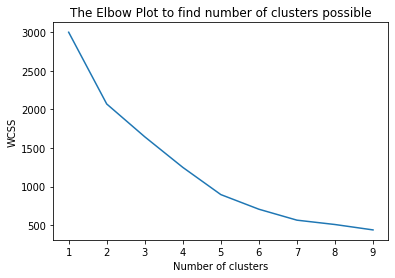

In [102]:
# finding the number of clusters with the help of elbow method
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(query_performance_scaled)

    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Plot to find number of clusters possible')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Observations: We can see that from the above elbow plot, 2 or 3 number of clusters there seems to be less change in the distance between the clusters, so here we can take 3 as the number of clusters

In [103]:
print(wcss)

[3000.000000000001, 2070.5194451855377, 1645.098951015507, 1249.0372853288357, 896.2129688912916, 706.7383645655705, 564.9669416706321, 508.5892246018344, 438.6278040526548]


In [104]:
# considering 3 as the number of clusters to making in the plot.
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(query_performance_scaled)

KMeans(n_clusters=3)

In [105]:
identified_clusters = kmeans.fit_predict(query_performance_scaled)
identified_clusters

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Fig - 20

Text(0, 0.5, 'Orders Values')

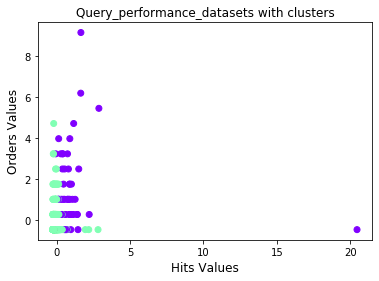

In [111]:
data_with_clusters = query_performance_scaled.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.title('Query_performance_datasets with clusters', fontsize=12)
plt.scatter(data_with_clusters['hits'],data_with_clusters['orders'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Hits Values', fontsize=12)
plt.ylabel('Orders Values', fontsize=12)

Observation: From the above clusters plot, we can see that there are two clusters seen, skyblue clusters having less hitvalues and less to moderate orders values, while purple clusters seems to have less but more than skyblue cluster's hitvalues and less to high order values.

# Fig - 21

Text(0, 0.5, 'Orders Values')

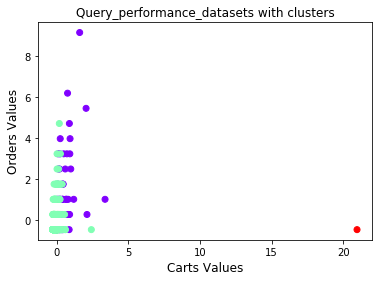

In [109]:
data_with_clusters = query_performance_scaled.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.title('Query_performance_datasets with clusters', fontsize=12)
plt.scatter(data_with_clusters['carts'],data_with_clusters['orders'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Carts Values', fontsize=12)
plt.ylabel('Orders Values', fontsize=12)

Observation: We can see that from the above clusters plot, there are three clusters skyblue, purple and red clusters, skyblue clusters indicating datasets with less cartedvalues and less to moderate orderd values, while purple cluster indicating less but more than skyblue clusters cartvalues and less to moderate ordered dataset values, and finally red clusters indicating high cartvalues but less ordered values.

# Fig - 22

Text(0, 0.5, 'ClickThrough Values')

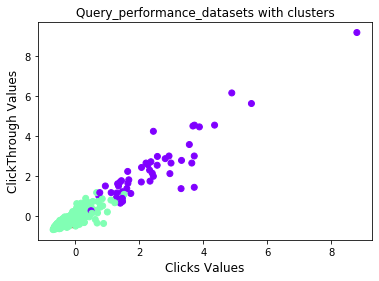

In [110]:
data_with_clusters = query_performance_scaled.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.title('Query_performance_datasets with clusters', fontsize=12)
plt.scatter(data_with_clusters['clicks'],data_with_clusters['clickThroughs'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Clicks Values', fontsize=12)
plt.ylabel('ClickThrough Values', fontsize=12)


Observation: We can see that from the above dataset, there seems to be two clusters primarily in the dataset, skyblue cluster indicating less click values to less click through values, while purple cluster indicating both less to high clickvalues and clickthrough values.

# CONCLUSIONS:

CONCLUSION:

    1) we can make out that our all the datasets are not having NULL values.
    2) Dress and Top are the maximum product types present in our datasets.
    3) There seems to be outliers present in our datasets, but they eventually turned out tobe important datasets having high values.
    4) Both clicks and carts values are highly correlated with orders column values.
    5) Linear regression model seems to be the perfect model if we need to predict the possible orders turned out tobe depending on the number of clicks and carted values of any particular product and eventually our model is working with the accuracy of 83%.
    6) We can see that from all the above box plots, there seems to be the outliers in the datasets, but thats primarily because of the uneven distributed clicks between the products, we have 5 products with clicks number ranging from 10000 to 15000, 2 products with clicks ranging from 15000 to 20000, 2 products with clicks ranging from 25000 to 30000, and 16 products with clicks ranging from 5000 to 10000
    7) We tried to categorize the datasets depending of Kmeans clustering technique, we found out there seems to be 3 clusters present in the datasets.
    8) In fig 20, we can see that there are two clusters seen, skyblue clusters having less hitvalues and less to moderate orders values, while purple clusters seems to have less but more than skyblue cluster's hitvalues and less to high order values.
    9) In fig 21, We can see that from the above clusters plot, there are three clusters skyblue, purple and red clusters, skyblue clusters indicating datasets with less cartedvalues and less to moderate orderd values, while purple cluster indicating less but more than skyblue clusters cartvalues and less to moderate ordered dataset values, and finally red clusters indicating high cartvalues but less ordered values.
    10) In fig 22, We can see that from the above dataset, there seems to be two clusters primarily in the dataset, skyblue cluster indicating less click values to less click through values, while purple cluster indicating both less to high clickvalues and clickthrough values.
   

# INFERENCES FOR BUSINESS ANALYTICS :

1) In fig 20, we can see that skyblue clusters are the group of people having less hit values but less to moderate order values, they seems to less loyal customers, we can run a loyalty or special focus program for them so that there conversion to customer ratio increases.

2) In fig 21, we can see that Purple clusters are the group of people having less to moderate hit values and less to high order values as well, these people can also be converted to customers by runing special discount, free shipping and other programs.

# THANK YOU

Vaibhav Tayade

vaibhav_t29@rediffmail.com

8087970061